                                                                             age
Valid N:                                                                   32561
                                                                                
Minimum:                                                                      17
Quartile 1:                                                                 28.0
Mode:                                                                         36
Median:                                                                     37.0
Mean:                                                                    38.5816
Quartile 3:                                                                 48.0
Max:                                                                          90
                                                                                
Standard Deviation:                                                      13.6404
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


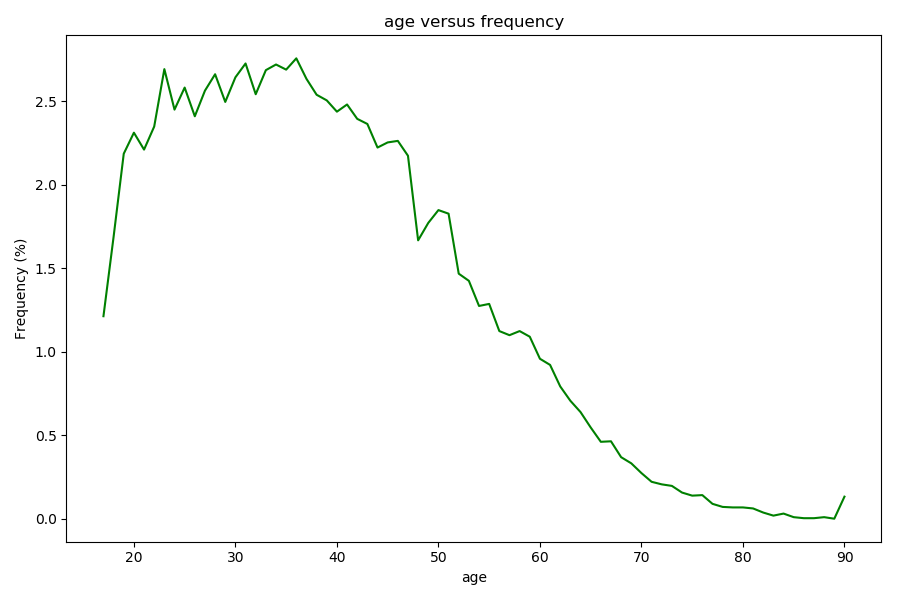

                                                                          fnlwgt
Valid N:                                                                   32561
                                                                                
Minimum:                                                                   12285
Quartile 1:                                                             117827.0
Mode:                                                                     123011
Median:                                                                 178356.0
Mean:                                                                189778.3665
Quartile 3:                                                             237051.0
Max:                                                                     1484705
                                                                                
Standard Deviation:                                                  105549.9777
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


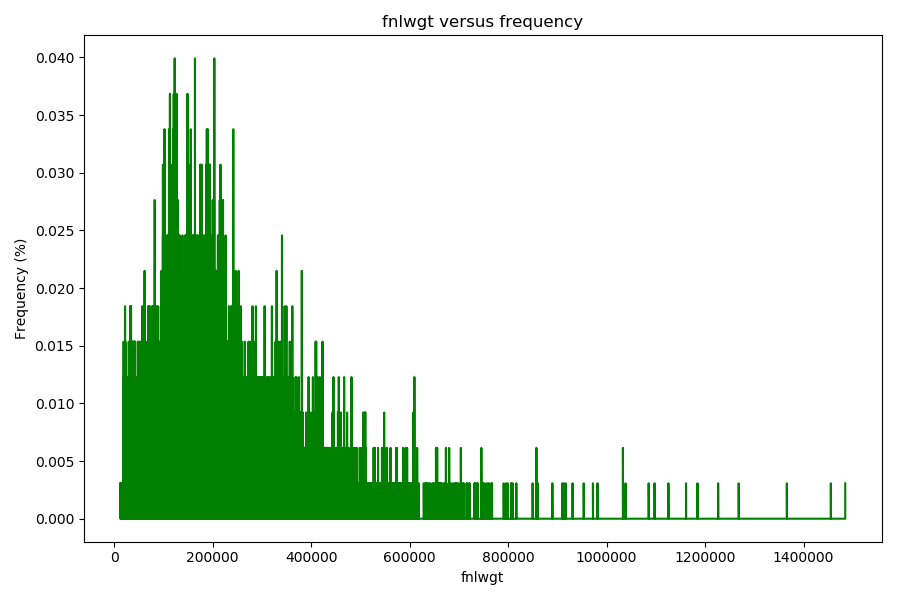

                                                                   education-num
Valid N:                                                                   32561
                                                                                
Minimum:                                                                       1
Quartile 1:                                                                  9.0
Mode:                                                                          9
Median:                                                                     10.0
Mean:                                                                    10.0807
Quartile 3:                                                                 12.0
Max:                                                                          16
                                                                                
Standard Deviation:                                                       2.5727
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


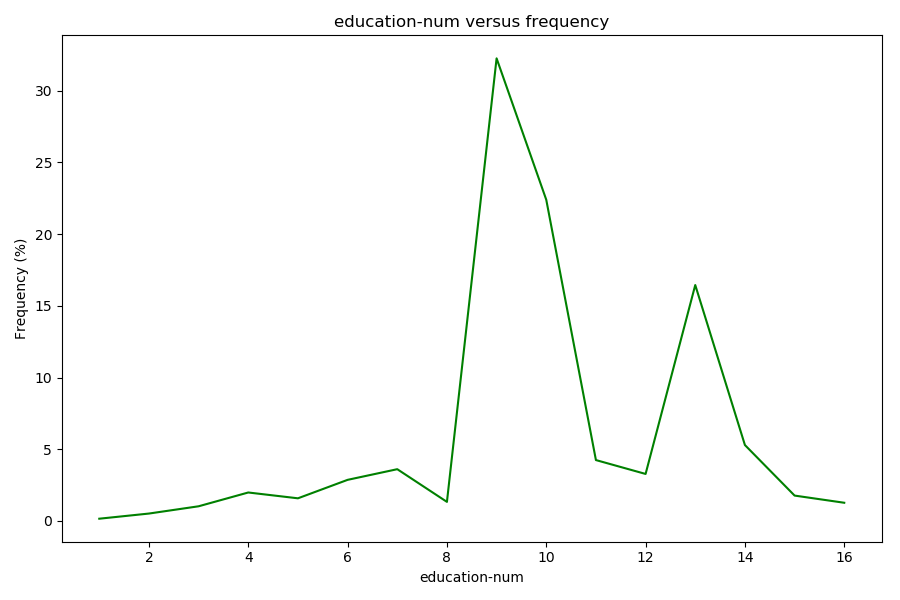

                                                                    capital-gain
Valid N:                                                                    2712
                                                                                
Minimum:                                                                     114
Quartile 1:                                                               3411.0
Mode:                                                                      15024
Median:                                                                   7298.0
Mean:                                                                 12938.5413
Quartile 3:                                                              14084.0
Max:                                                                       99999
                                                                                
Standard Deviation:                                                   22395.4135
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


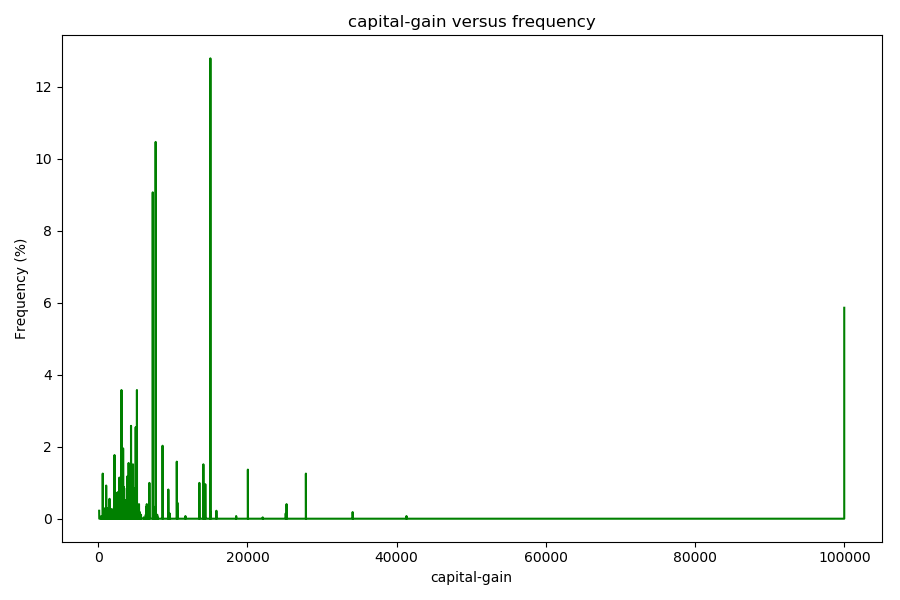

                                                                    capital-loss
Valid N:                                                                    1519
                                                                                
Minimum:                                                                     155
Quartile 1:                                                               1672.0
Mode:                                                                       1902
Median:                                                                   1887.0
Mean:                                                                  1871.4286
Quartile 3:                                                               1977.0
Max:                                                                        4356
                                                                                
Standard Deviation:                                                     376.5715
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


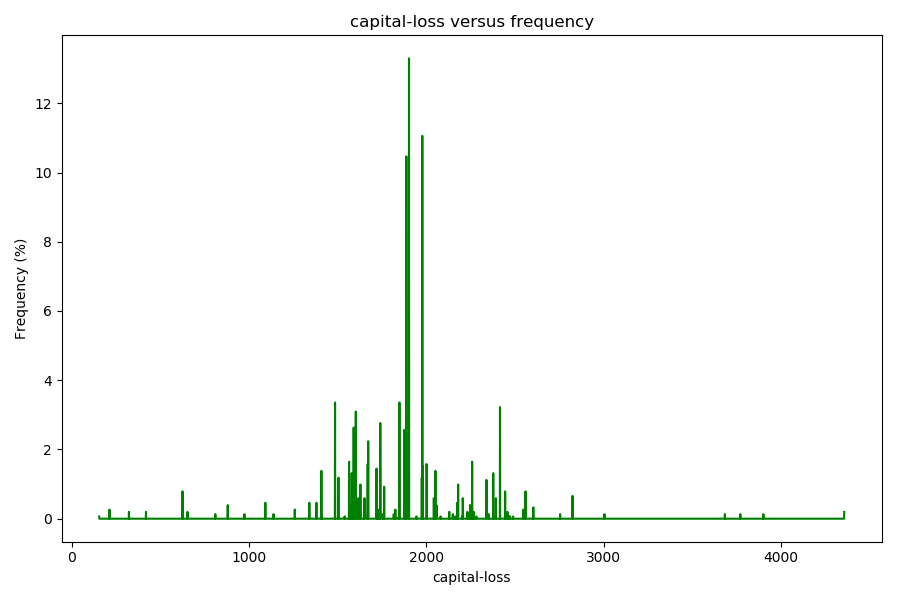

                                                                  hours-per-week
Valid N:                                                                   32561
                                                                                
Minimum:                                                                       1
Quartile 1:                                                                 40.0
Mode:                                                                         40
Median:                                                                     40.0
Mean:                                                                    40.4375
Quartile 3:                                                                 45.0
Max:                                                                          99
                                                                                
Standard Deviation:                                                      12.3474
Inter-Quartile Range:       

<IPython.core.display.Javascript object>


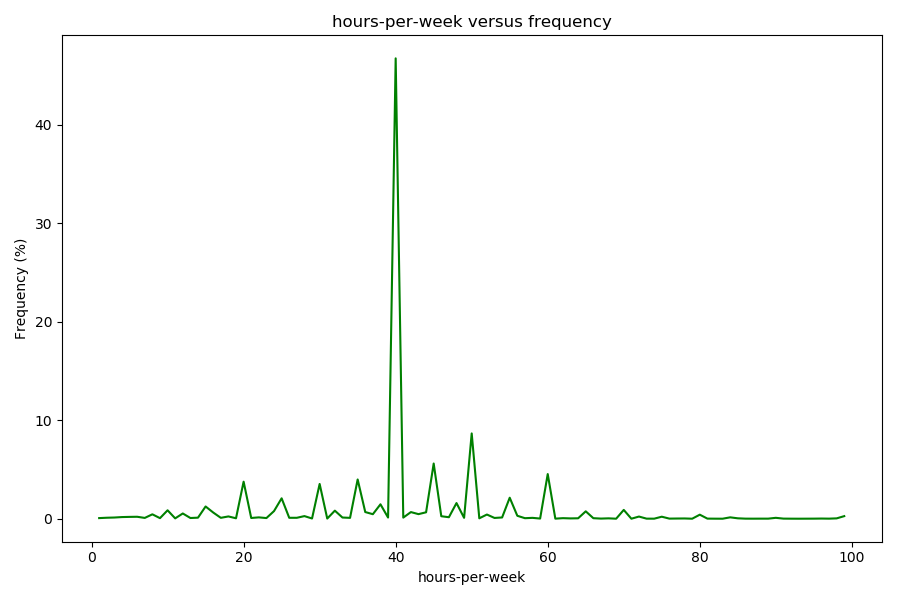

<IPython.core.display.Javascript object>


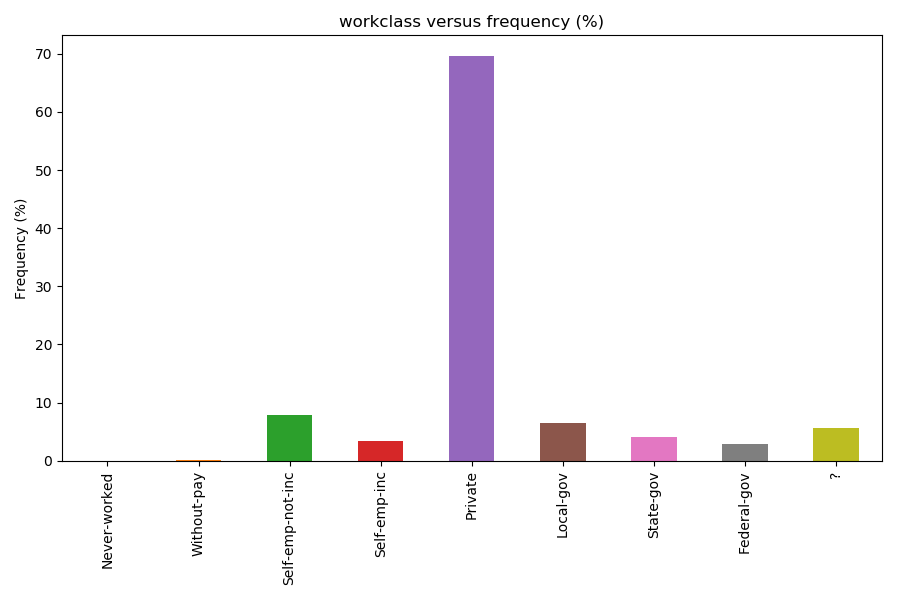

<IPython.core.display.Javascript object>


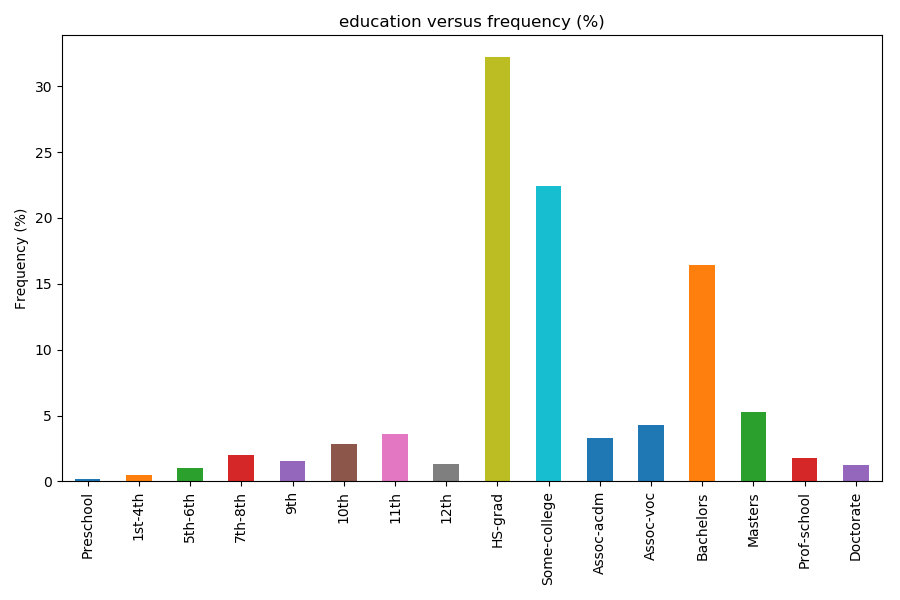

<IPython.core.display.Javascript object>


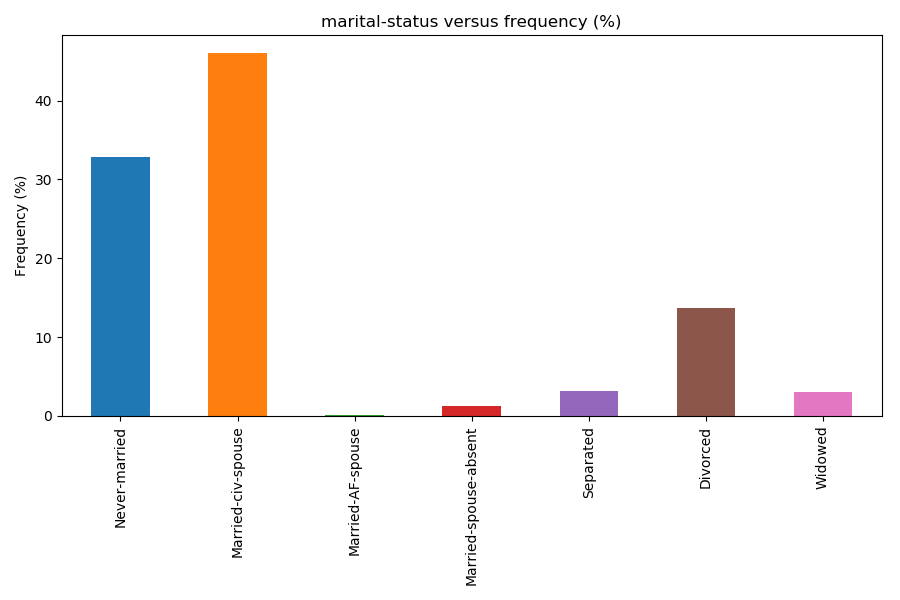

<IPython.core.display.Javascript object>


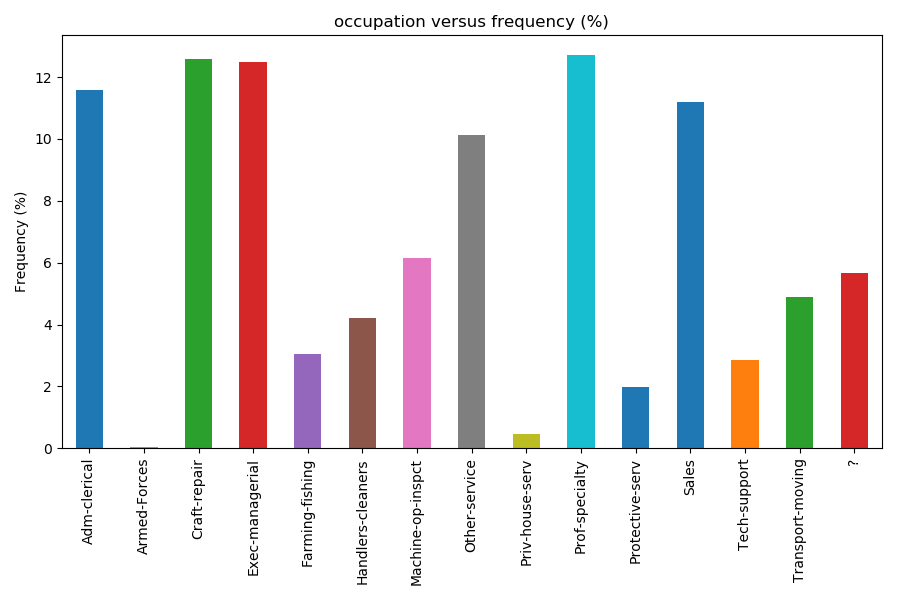

<IPython.core.display.Javascript object>


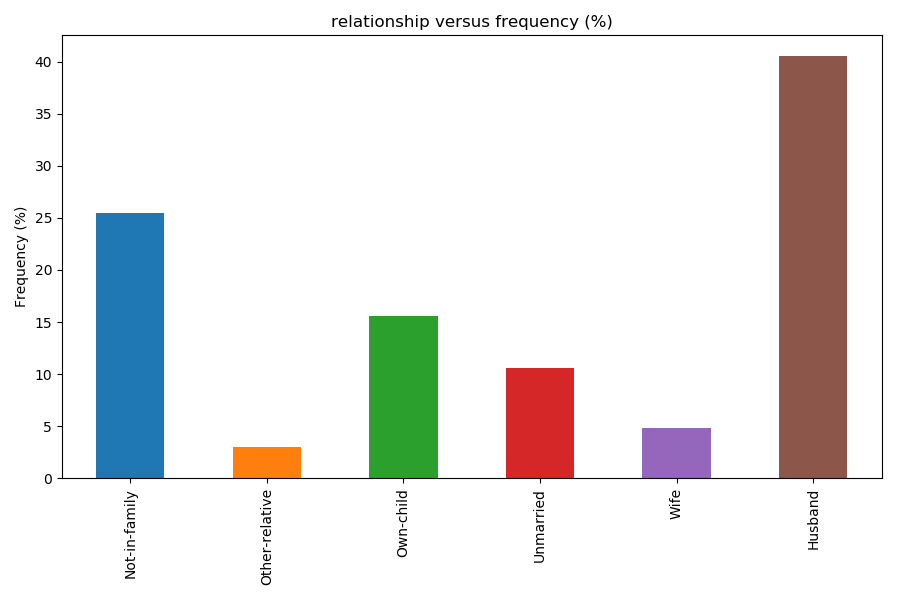

<IPython.core.display.Javascript object>


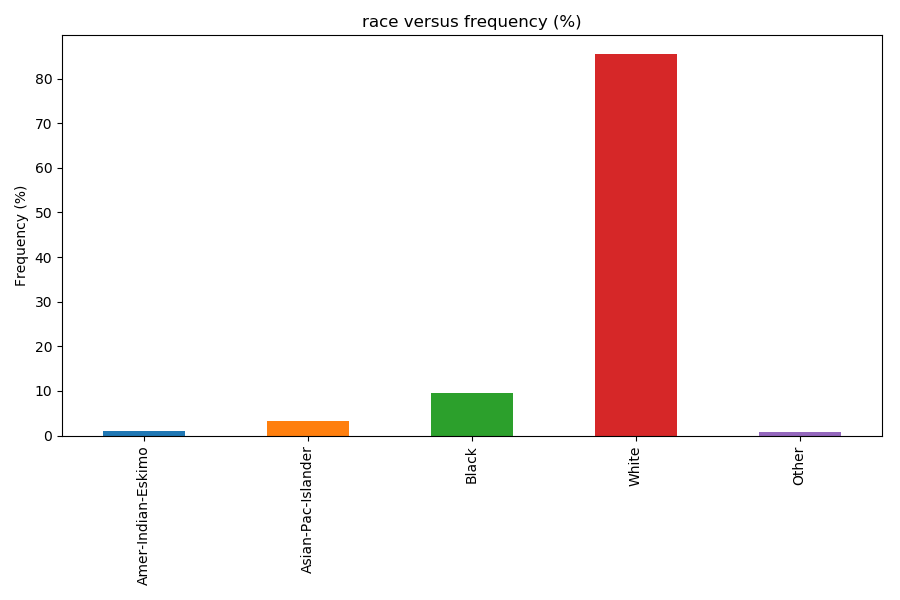

<IPython.core.display.Javascript object>


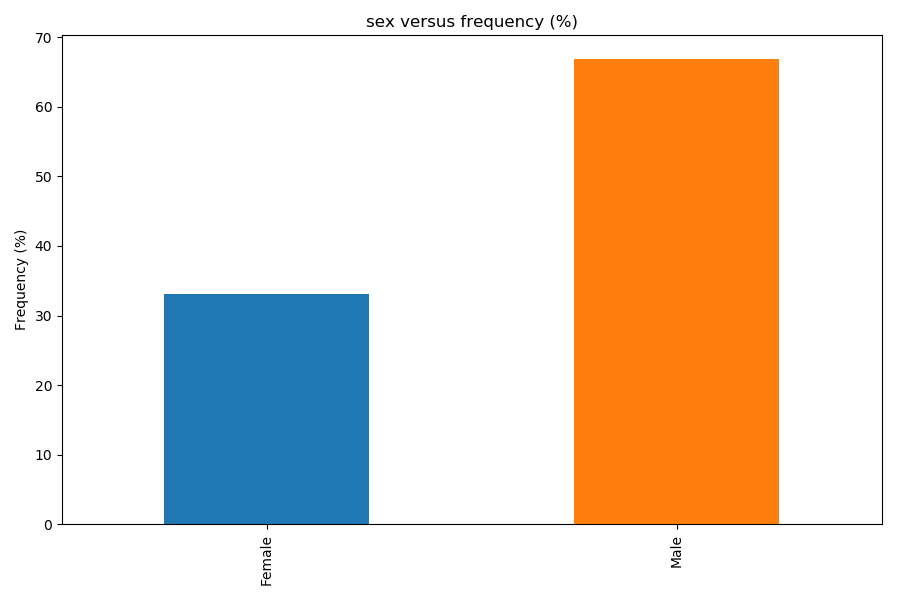

<IPython.core.display.Javascript object>


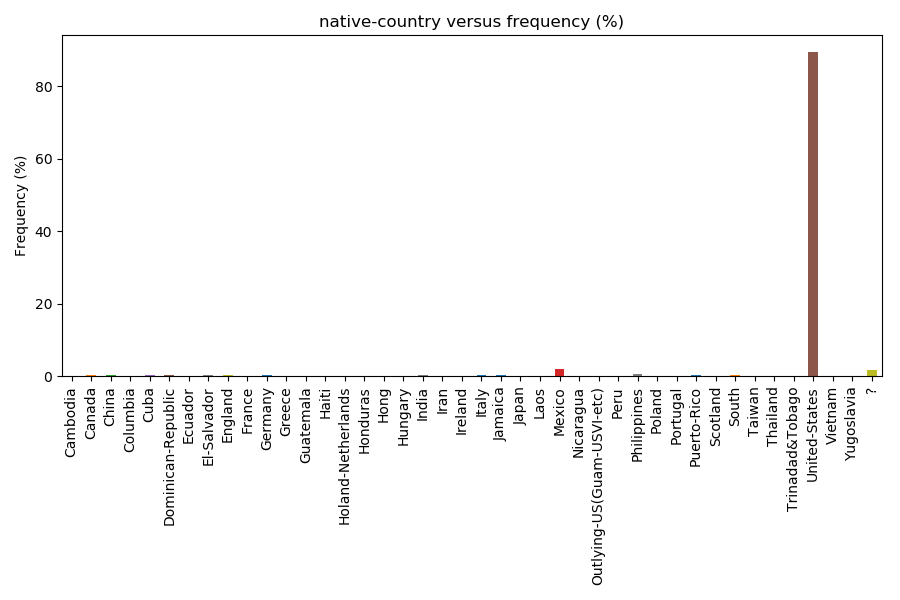

<IPython.core.display.Javascript object>


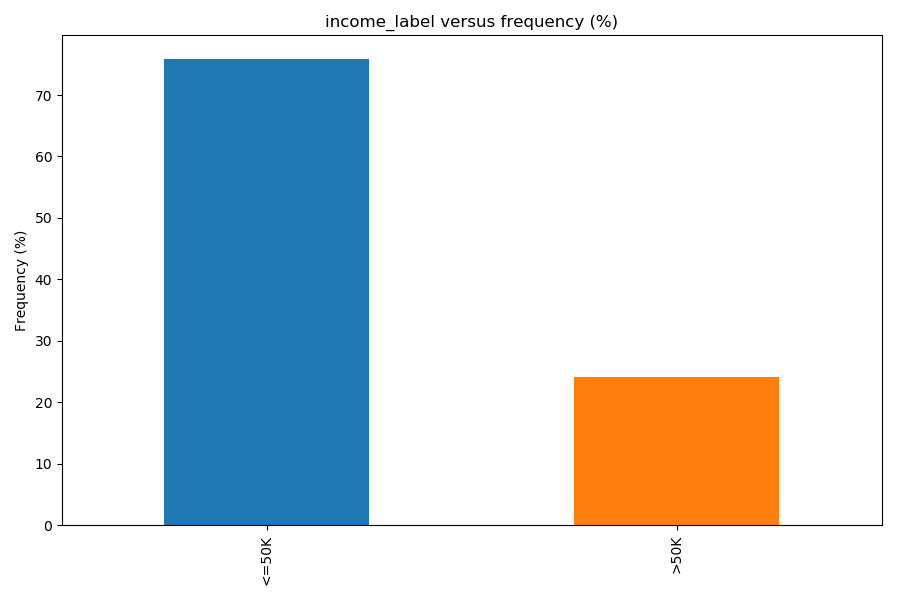

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.078141       0.066345      0.185141      0.219137   
fnlwgt         -0.078141  1.000000      -0.035706      0.005299     -0.045770   
education-num   0.066345 -0.035706       1.000000      0.445117      0.185219   
capital-gain    0.185141  0.005299       0.445117      1.000000           NaN   
capital-loss    0.219137 -0.045770       0.185219           NaN      1.000000   
hours-per-week  0.142907 -0.021621       0.167215      0.287465      0.151686   

                hours-per-week  
age                   0.142907  
fnlwgt               -0.021621  
education-num         0.167215  
capital-gain          0.287465  
capital-loss          0.151686  
hours-per-week        1.000000  


<IPython.core.display.Javascript object>


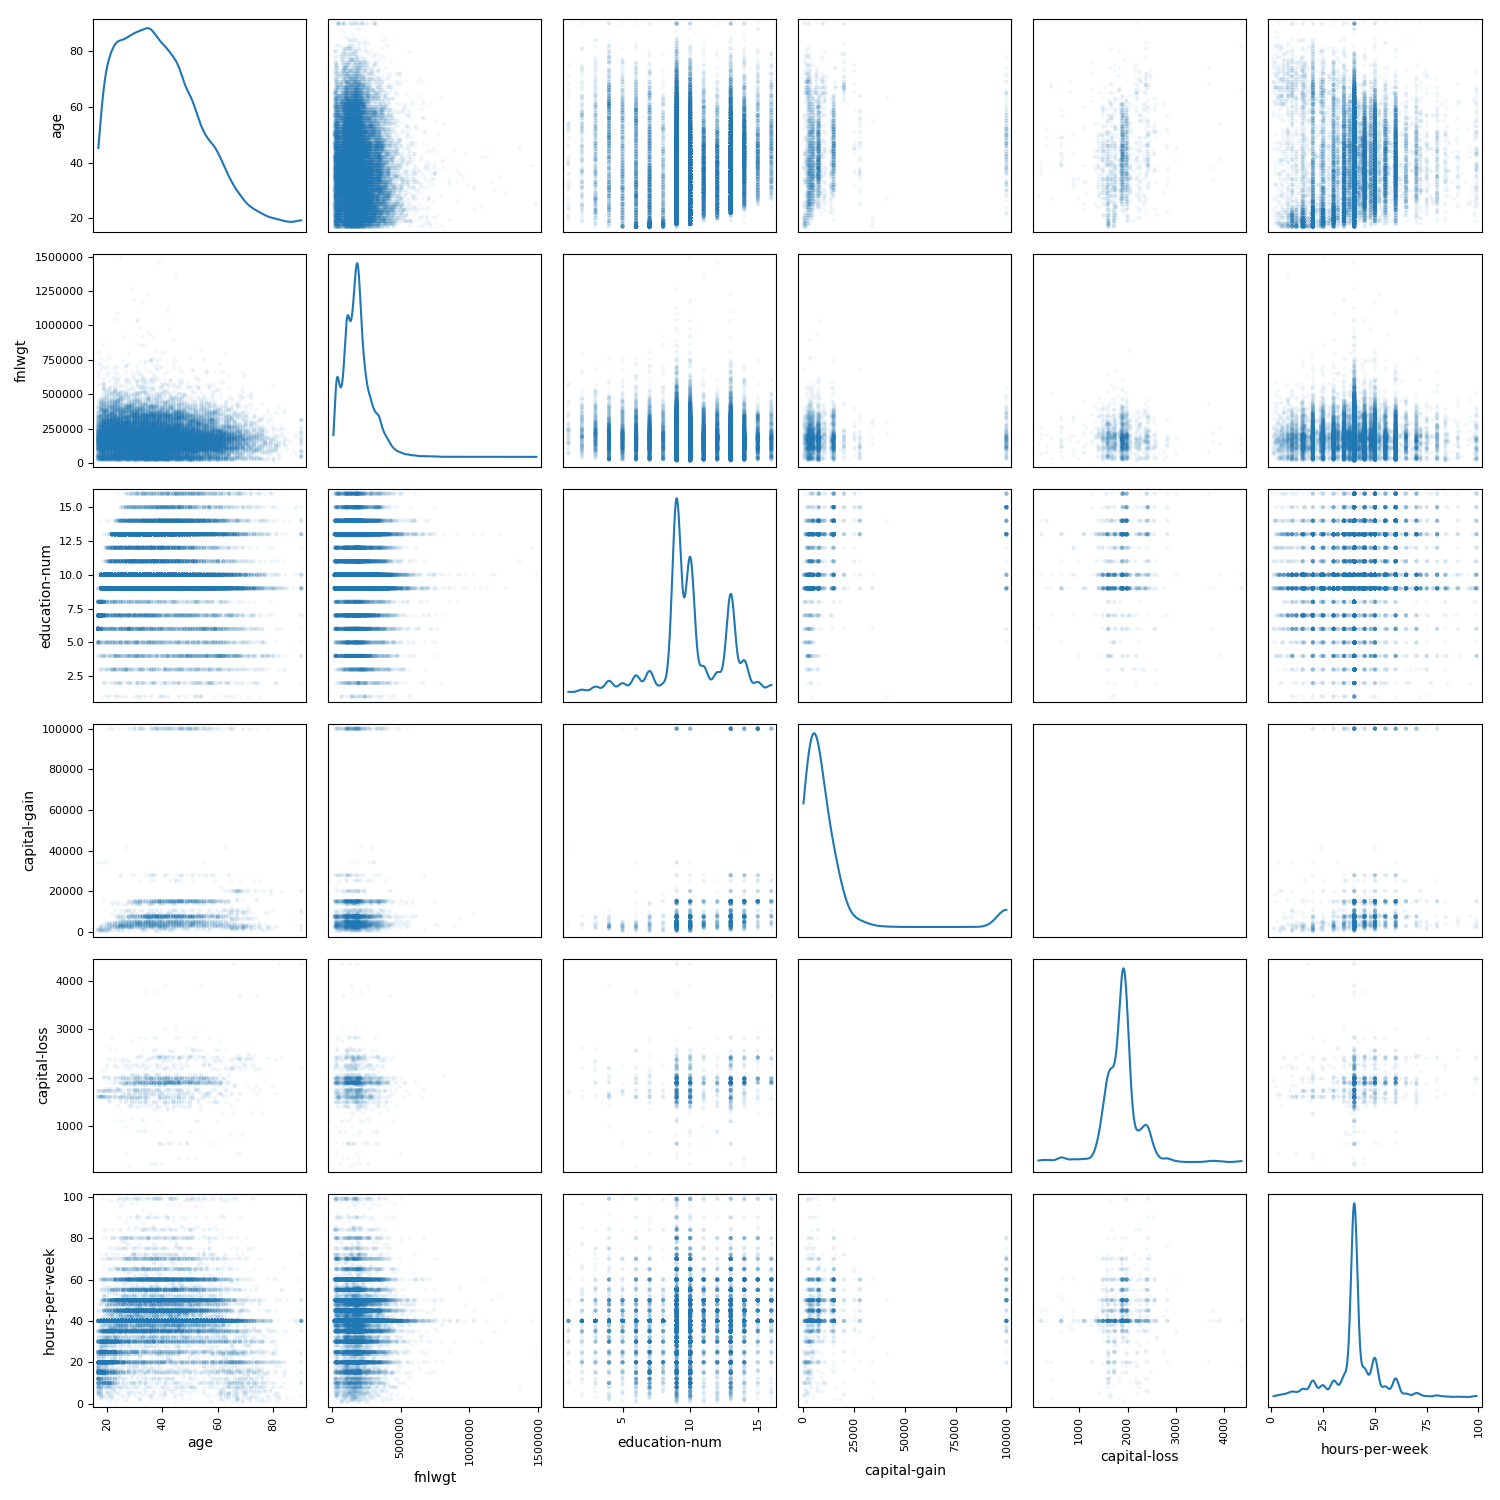

In [2]:
import sqlite3
import pandas
import numpy
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as python_plot
import pandas.plotting
from math import isnan

# some set-up of column headers

census_headers = ['age', 'workclass', 'fnlwgt', 'education',
        'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss',
        'hours-per-week', 'native-country', 'income_label']

numeric_headers = [census_headers[0], census_headers[2], census_headers[4],
        census_headers[10], census_headers[11],census_headers[12]]

non_numeric_headers = [census_headers[1], census_headers[3], census_headers[5], census_headers[6],
        census_headers[7], census_headers[8], census_headers[9], census_headers[13], census_headers[14]]

non_numeric_values = {
    'workclass':['Never-worked', 'Without-pay', 'Self-emp-not-inc',
            'Self-emp-inc', 'Private', 'Local-gov', 'State-gov', 'Federal-gov', '?'],
    'education':['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
            'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'],
    'marital-status':['Never-married', 'Married-civ-spouse', 'Married-AF-spouse',
            'Married-spouse-absent', 'Separated', 'Divorced', 'Widowed'],
    'occupation':['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing',
            'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
            'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', '?'],
    'relationship':['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Husband'],
    'race':['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'White', 'Other'],
    'sex':['Female', 'Male'],
    # Note, "Hong" and "South" seem to be data mining errors (All fields with 2+ words have hyphens or ampersands)
    'native-country':['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
            'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong',
            'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
            'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland',
            'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia', '?'],
    'income-label':['<=50K', '>50K']
}

census_data_frame = pandas.read_csv('adult.data', names=census_headers)
census_data_frame['capital-gain'].replace(0, numpy.nan, inplace=True)
census_data_frame['capital-loss'].replace(0, numpy.nan, inplace=True)

numeric_census_data_frame = census_data_frame.drop(non_numeric_headers, axis=1)
non_numeric_census_data_frame = census_data_frame.drop(numeric_headers, axis=1)

# go through numeric data (e.g. integers like age or hours-per-week)
for header, values in numeric_census_data_frame.iteritems():
    value_data_frame = pandas.DataFrame(values)
    
    # print a summary of different statistical moments and properties
    print(header.rjust(80))
    print("Valid N:".ljust(40) + ("%.0f" % value_data_frame.count()[0]).rjust(40))
    print(" " * 80)
    print("Minimum:".ljust(40) + ("%.0f" % value_data_frame.min()[0]).rjust(40))
    print("Quartile 1:".ljust(40) + ("%.1f" % value_data_frame.quantile(.25)[0]).rjust(40))
    print("Mode:".ljust(40) + ("%.0f" % value_data_frame.mode().iloc[0][0]).rjust(40))
    print("Median:".ljust(40) + ("%.1f" % value_data_frame.median()[0]).rjust(40))
    print("Mean:".ljust(40) + ("%.4f" % value_data_frame.mean()[0]).rjust(40))
    print("Quartile 3:".ljust(40) + ("%.1f" % value_data_frame.quantile(.75)[0]).rjust(40))
    print("Max:".ljust(40) + ("%.0f" % value_data_frame.max()[0]).rjust(40))
    print(" " * 80)
    print("Standard Deviation:".ljust(40) + ("%.4f" % value_data_frame.std()[0]).rjust(40))
    print("Inter-Quartile Range:".ljust(40) + ("%.1f" % (value_data_frame.quantile(.75)[0]-value_data_frame.quantile(.25)[0])).rjust(40))
    print("Variance:".ljust(40) + ("%.4f" % value_data_frame.var()[0]).rjust(40))
    print(" " * 80)
    print("Skew:".ljust(40) + ("%.4f" % value_data_frame.skew()[0]).rjust(40))
    print(" " * 80)
    print("Kurtosis:".ljust(40) + ("%.4f" % value_data_frame.kurt()[0]).rjust(40))
    
    # get values and their frequencies
    statistics = {}
    for value in values:
        if value in statistics:
            statistics[value] += 1
        # capital-gain and capital-loss seem to use zero as a null value
        elif not isnan(value):
            statistics[value] = 1
    independent_axis = []
    dependent_axis = []
    for key in sorted(statistics):
        independent_axis.append(key)
        dependent_axis.append(statistics[key] * 100.0 / pandas.DataFrame(values).count()[0])
    
    # this block is for adding zeros in the undefined range so the graph represents zeros
    min_domain = int(independent_axis[0])
    max_domain = int(independent_axis[len(independent_axis)-1])
    augmented_independent_axis = range(min_domain, max_domain+1)
    augmented_dependent_axis = [0] * (len(augmented_independent_axis))
    alternate_index = 0
    for index in range(len(augmented_independent_axis)):
        if augmented_independent_axis[index] == independent_axis[alternate_index]:
            augmented_dependent_axis[index] = dependent_axis[alternate_index]
            alternate_index += 1
    
    # graph the line chart
    python_plot.figure(figsize=(9, 6))
    python_plot.plot(augmented_independent_axis, augmented_dependent_axis, color='g')
    python_plot.xlabel(header)
    python_plot.ylabel('Frequency (%)')
    python_plot.title(header + ' versus frequency')
    python_plot.tight_layout()
    python_plot.show()
    
# go through string data (e.g. enumerations like sex or native-country)
for header, values in non_numeric_census_data_frame.iteritems():
    # get values and their frequencies
    statistics = {}
    for key in non_numeric_values[header]:
        statistics[key] = 0
    for value in values:
        #Values like "Never-worked" and "State-gov" have leading whitespace in the pandas data frame
        statistics[value.strip()] += 1
    independent_axis = []
    dependent_axis = []
    for key in non_numeric_values[header]:
        independent_axis.append(key)
        dependent_axis.append(statistics[key] * 100.0 / len(values))
        
    # graph the bar chart
    x_tick = numpy.arange(len(independent_axis))
    python_plot.figure(figsize=(9, 6))
    graph_data = pandas.Series(dependent_axis)
    graph = graph_data.plot(kind='bar')
    graph.set_title(header + ' versus frequency (%)')
    graph.set_ylabel('Frequency (%)')
    graph.set_xticklabels(independent_axis)
    python_plot.tight_layout()
    python_plot.show()

# print correlation matrix
print(numeric_census_data_frame.corr(method='spearman'))

#TODO: get all non-NaN data

# print the scatterplot matrix
from pandas.plotting import scatter_matrix
pandas.plotting.scatter_matrix(numeric_census_data_frame, alpha=0.05, figsize=(15, 15), diagonal='kde')
python_plot.tight_layout()
python_plot.show()